# BL40A2010 Introduction to IoT-Based Systems

## Assignment 4, DD.MM.YYYY

### Author:

**(1) Draw a graph with star topology with five nodes (one in the center $A$, four in the edges $B$-$E$).
If the topology is directed as a many-to-one topology, write the structure of awareness of the system, considering that nodes $B$-$E$ acquire and process data about a supporting reality $T$, while $A$ can only receive data from it. Remember the notation $Xy$ means the image of $X$ by $Y$.**

In [8]:
import networkx as nx #https://networkx.github.io/
import matplotlib.pyplot as plt #https://matplotlib.org/
import scipy as sp
import numpy as np

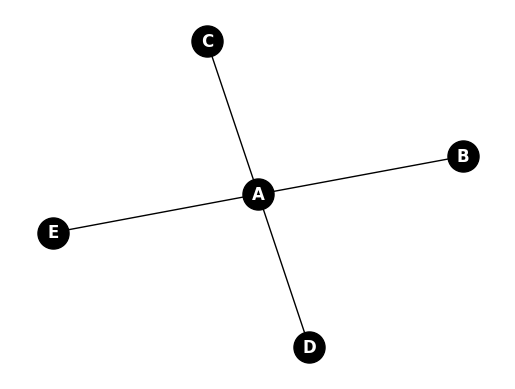

In [9]:
G = nx.Graph()
G = nx.star_graph(4)
nx.draw_networkx(G, node_color='black', font_color='white', edge_color='black',
                 font_weight='bold',  node_size=500, labels={0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E'})
plt.axis('off')
plt.show()

**(2) Assume that graph illustrate a scenario of four sensor nodes that also (pre-)process data and one aggregator node as follows. Nodes $B$ and $C$ monitor temperature and wind speed at Airport station in Lappeenranta, respectively. Nodes $D$ and $E$ monitor temperature and wind speed at Lepola station in Lappeenranta, respectively. Nodes $B$ and $D$ send a binary message to $A$ indicating if during that period the temperature was more than $25$ degrees ("1" means above, "0" means below or equal to). Likewise nodes $C$ and $E$ send a binary message to $A$ indicating if during that period the wind speed was more than $5$ m/s ("1" means above, "0" means below or equal to). Download and plot the data from [FMI](http://en.ilmatieteenlaitos.fi/download-observations\#!/) with 1 hour resolution during July, 2018. Using this data, plot the binary signals sent from the nodes $B$-$E$ to the aggregator $A$.**

In [10]:
#Import libraries
import pandas as pd #https://pandas.pydata.org/
#import matplotlib.pyplot as plt #https://matplotlib.org/
import matplotlib.dates as mdates #https://matplotlib.org/
#import numpy as np #http://www.numpy.org/
#from datetime import date #https://docs.python.org/3/library/datetime.html

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
# read csv data from Lappeenranta Lepola
lepola = pd.read_csv("lpr-lepola.csv", dayfirst=True, sep=",",
                      header=0, decimal=b".", index_col=0,
                      parse_dates=[[0,1,2,3]], usecols=[0,1,2,3,5,6])

lepola.info()

<class 'pandas.core.frame.DataFrame'>
Index: 745 entries, 2018 7 1 00:00 to 2018 8 1 00:00
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Air temperature (degC)  745 non-null    float64
 1   Wind speed (m/s)        740 non-null    float64
dtypes: float64(2)
memory usage: 17.5+ KB


In [15]:
# read csv data from Lappeenranta Lentoasema
lentoasema = pd.read_csv("lpr-lentoasema.csv", dayfirst=True, sep=",",
                      header=0, decimal=b".", index_col=0,
                      parse_dates=[[0,1,2,3]], usecols=[0,1,2,3,5,6])

lentoasema.info()

<class 'pandas.core.frame.DataFrame'>
Index: 745 entries, 2018 7 1 00:00 to 2018 8 1 00:00
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Air temperature (degC)  745 non-null    float64
 1   Wind speed (m/s)        745 non-null    float64
dtypes: float64(2)
memory usage: 17.5+ KB


In [16]:
# assigning each nodes
nodes_b = lentoasema.drop(columns="Wind speed (m/s)")
nodes_c = lentoasema.drop(columns="Air temperature (degC)")
nodes_d = lepola.drop(columns="Wind speed (m/s)")
nodes_e = lepola.drop(columns="Air temperature (degC)")

nodes_b.info();
nodes_c.info();
nodes_d.info();
nodes_e.info();

<class 'pandas.core.frame.DataFrame'>
Index: 745 entries, 2018 7 1 00:00 to 2018 8 1 00:00
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Air temperature (degC)  745 non-null    float64
dtypes: float64(1)
memory usage: 11.6+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 745 entries, 2018 7 1 00:00 to 2018 8 1 00:00
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Wind speed (m/s)  745 non-null    float64
dtypes: float64(1)
memory usage: 11.6+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 745 entries, 2018 7 1 00:00 to 2018 8 1 00:00
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Air temperature (degC)  745 non-null    float64
dtypes: float64(1)
memory usage: 11.6+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 7

**(3) Node $A$ needs to identify risky situations in Lappeenranta when the temperature is above $25$ degrees and the wind is above $5$ m/s based on the sensors' signals. If a risky situation is identified at node $A$ as binary number "1" while normal situations as "0". How would you solve this problem? Plot the output signal from node $A$ and discuss its relation to the input signals from $B$-$E$.**